# Traffic Simulation

## About the Assignment

You are going to create a simulation of traffic on a road and find the optimal speed limit for the road. In the normal mode below, this is for 1 kilometer of road. We start by listing our assumptions. These will simplify the problem from the real world.

## Assumptions

* Drivers want to go up to 120 km/hr. (~33 mps)
* The average car is 5 meters long.
* Drivers want at least a number of meters equal to their speed in meters/second between them and the next car.
* Drivers will accelerate 2 m/s up to their desired speed as long as they have room to do so.
* If another car is too close, drivers will match that car's speed until they have room again.
* If a driver would hit another car by continuing, they stop.
* Drivers will randomly (10% chance each second) slow by 2 m/s.

This section of road is one lane going one way.

Given all this information, create a simulation of traffic on this road. Even though the road is not circular in real life, you should treat it as such: cars exiting the road start again at the beginning. This is to simulate a continuous stream of traffic. When you start the simulation, add 30 cars to the road per kilometer, evenly spaced. Then run the simulation for one minute to get a continuous, randomized stream of traffic.

The optimal speed limit is one standard deviation above the mean speed. For ease of drivers, this should be rounded down to an integer.

Your final report should have a graph of traffic over time, showing traffic jams, as well as your recommendation for the speed limit. Add any plots that back up your analysis.

## Car Blueprint

In [782]:
class Car:
    
    def __init__(self, **kwargs):
        self.name = ''
        self.length = 5
        self.acceleration = 2
        self.desired_separation = 0
        self.speed = 0
        self.location = 0
        self.max_speed = 33
        self.color = 0
        
        for k in kwargs.keys():
            if k in ['name', 'color']:
                self.__setattr__(k, kwargs[k])

## Setup Simulation

In [783]:
import numpy as np
import matplotlib.pyplot as plt

from random import randrange, random
%matplotlib inline
time = []

## Build Cars

In [784]:
cars = []
for x in range(30):
    cars.append(Car(name='Car{}'.format(x), color=randrange(100, 500)))

## Place cars on road

In [791]:
road = np.zeros((1000, ), dtype='int')
spacing = round((1000 - 30 * 5) / 30) + 5
idx = 0

for x in range(spacing, len(road), spacing):
    if cars[idx] in cars:
        road[x:x-5:-1] = road[x:x-5:-1] + cars[idx].color
        cars[idx].location = x
        idx += 1

## Save 1st second to time matrix

In [788]:
time.append(road)

## Start simulation

In [790]:
def check_tailgate(road, cars):
    tailgated_car = sorted(road[car.location + 1:car.location + car.speed + car.acceleration], reverse=True)[0]
    for tailgated in cars:
        if tailgated.color == tailgated_car:
            print("Tailgated car: {} Speed: {} ID: {}".format(tailgated.name,
                                                              tailgated.speed,
                                                              tailgated.color))
#             car.speed = tailgated.speed
            print(road[car.location:car.location + car.speed + 4])
            car_view = np.array(road[car.location:car.location + car.speed + 4])
            avail_dist = int(np.argwhere(car_view > 1)[0])
            print("Avail Dist: ", avail_dist)
            car.speed = avail_dist
            car.location += car.speed
            print("Car: {} Speed: {} ID: {}".format(car.name, car.speed, car.color))

for x in range(60):
    road = np.zeros((1000, ), dtype='int')
    print("Second: ", x + 1)
    cars_in_position = sorted(cars, key=lambda x: x.location, reverse=True)
    for car in cars_in_position:
        print(car.location)
        if any(road[car.location:car.location + car.speed + 2]) != 0:
            check_tailgate(road, cars)
        elif car.speed < car.max_speed:
            car.location += car.acceleration + car.speed
        else:
            car.location += car.speed

        if random() > 0.10 and car.speed < car.max_speed:
            car.speed += car.acceleration

        if car.location > 999:
            car.location = car.location - 1000
            
        road[car.location:car.location-5:-1] = road[car.location:car.location-5:-1] + car.color
    print(road)
    print("=" * 100)
    time.append(road)

Second:  1
990
957
924
891
858
825
792
759
726
693
660
627
594
561
528
495
462
429
396
363
330
297
264
231
198
165
132
99
66
33
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 313 313 313 313 313
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 156 156 156 156 156   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 379 379 379 379 379   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 172 172 172 172 172   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 140 140 140 140 140   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 310 310
 310 310 310   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

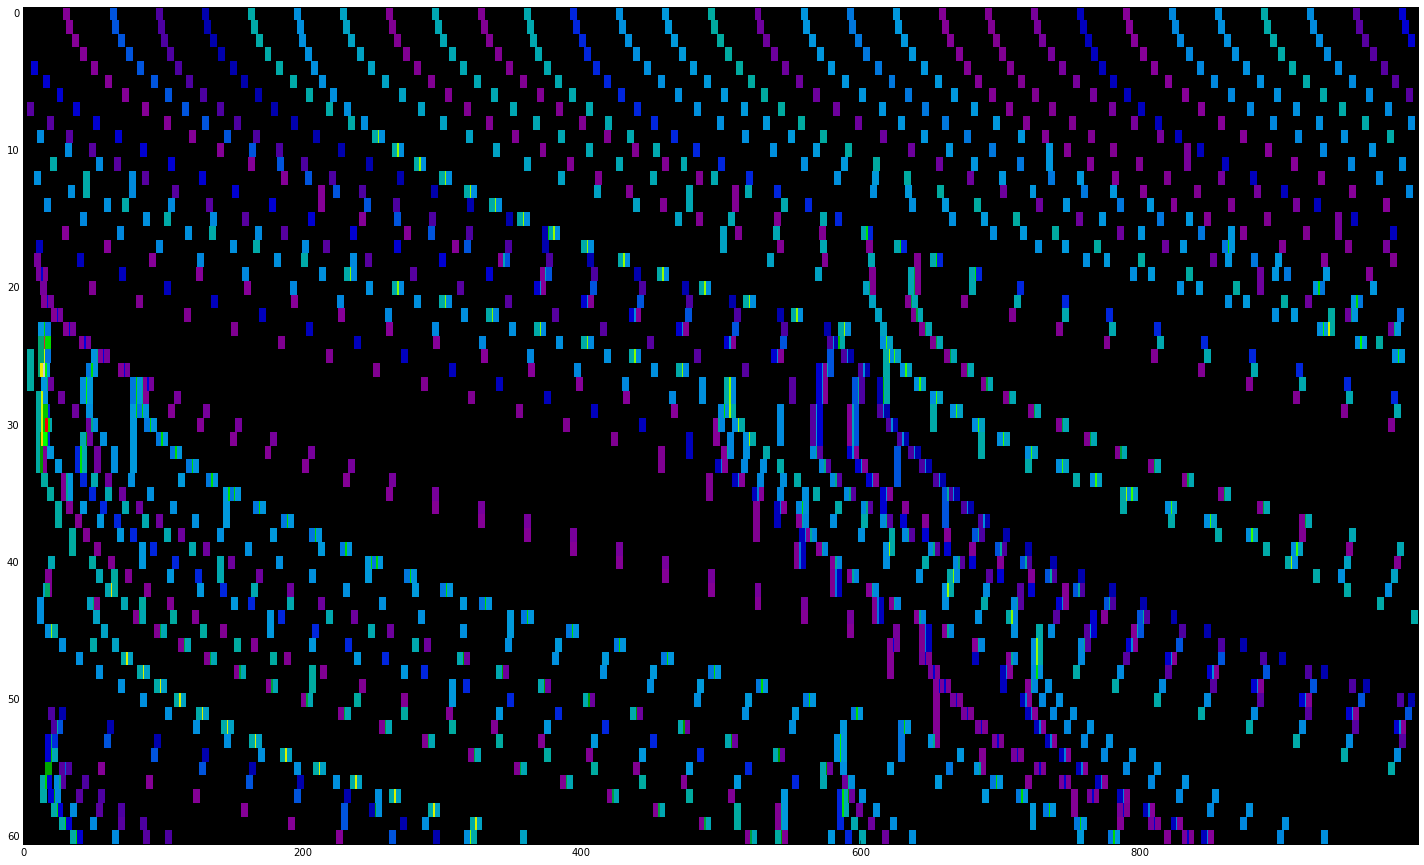

In [781]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(25, 15)) # size is in "inches"
plt.imshow(time, cmap='spectral', interpolation='nearest', aspect='auto')
plt.show()